In [16]:
import requests
r = requests.get('http://www.citibikenyc.com/stations/json')

key_list = [] #unique list of keys for each station listing
for station in r.json()['stationBeanList']:
    for k in station.keys():
        if k not in key_list:
            key_list.append(k)
            

In [15]:
key_list

[u'availableDocks',
 u'totalDocks',
 u'city',
 u'altitude',
 u'stAddress2',
 u'longitude',
 u'lastCommunicationTime',
 u'postalCode',
 u'statusValue',
 u'testStation',
 u'stAddress1',
 u'stationName',
 u'landMark',
 u'latitude',
 u'statusKey',
 u'availableBikes',
 u'id',
 u'location']

In [4]:
# Put the JSON into a dataframe
from pandas.io.json import json_normalize
df = json_normalize(r.json()['stationBeanList'])

In [5]:
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,19,20,,72,,2016-05-04 05:51:23 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,10,23,,79,,2016-05-04 05:49:22 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,1,26,,82,,2016-05-04 05:51:22 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,31,29,,83,,2016-05-04 05:50:20 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,15,24,,116,,2016-05-04 05:51:14 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


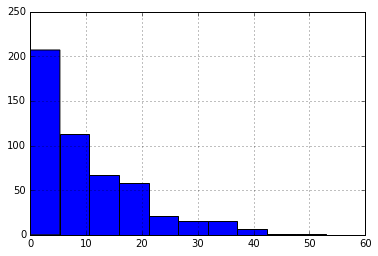

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df['availableBikes'].hist()
plt.show()

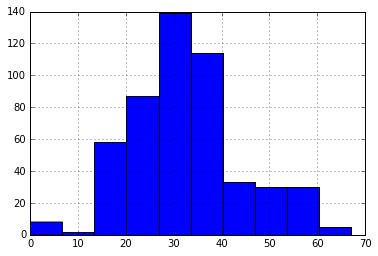

In [7]:
plt.clf()
df['totalDocks'].hist()
plt.show()

In [8]:
df['totalDocks'].mean()

32.36166007905138

In [9]:
condition = (df['statusValue'] == 'In Service')
df[condition]['totalDocks'].mean()

32.94556451612903

In [12]:
# df['totalDocks'].median()
df[df['statusValue'] == 'In Service']['totalDocks'].median()

31.0